In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Arm:
    def __init__(self, mean = 0, std = 1, d_mean = 0, d_std = 0.01):
        self.mean = mean
        self.std = std

        self.d_mean = d_mean
        self.d_std = d_std

    def pull(self):
        res = np.random.normal(self.mean, self.std)
        self.mean += np.random.normal(self.d_mean, self.d_std)

        return res
    
    def __str__(self):
        return f"Arm(mean={self.mean}, std={self.std})"

    

In [7]:
class Bandit:
    def __init__(self, n_arms = 10):
        self.arms = [Arm() for _ in range(n_arms)]
    
    def pull(self, arm):
        return self.arms[arm].pull()
    
    def optimal_action(self):
        return np.argmax([arm.mean for arm in self.arms])

In [70]:
def epsilon_greedy(epsilon, n_steps):
    bandit = Bandit(n_arms=10)

    epsilon = 0.1

    Q = np.zeros(len(bandit.arms))
    N = np.zeros(len(bandit.arms))

    rewards = []
    is_optimal_l = []

    for i in range(n_steps):
        if np.random.rand() < epsilon:
            A = np.random.randint(len(bandit.arms))
        else:
            A = np.argmax(Q + np.random.randn(len(bandit.arms)))

        opt_A = bandit.optimal_action()
        
        R = bandit.pull(A)
        N[A] += 1
        Q[A] += (R - Q[A]) / N[A]

        is_optimal = A == opt_A

        rewards.append(R)
        is_optimal_l.append(is_optimal)

    return rewards, is_optimal_l

In [74]:
all_rewards = []
all_is_optimal = []

for i in range(2000):
    rewards, is_optimal_l = epsilon_greedy(0.1, 10000)

    all_rewards.append(rewards)
    all_is_optimal.append(is_optimal_l)

all_rewards = np.array(all_rewards)
all_is_optimal = np.array(all_is_optimal)

In [75]:
all_rewards_step_mean = np.mean(all_rewards, axis=0)
all_is_optimal_step_mean = np.mean(all_is_optimal, axis=0)

In [85]:
def epsilon_greedy_const_step(epsilon, n_steps, step_size = 0.1):
    bandit = Bandit(n_arms=10)

    epsilon = 0.1

    Q = np.zeros(len(bandit.arms))
    N = np.zeros(len(bandit.arms))

    rewards = []
    is_optimal_l = []

    for i in range(n_steps):
        if np.random.rand() < epsilon:
            A = np.random.randint(len(bandit.arms))
        else:
            A = np.argmax(Q + np.random.randn(len(bandit.arms)))

        opt_A = bandit.optimal_action()
        
        R = bandit.pull(A)
        N[A] += 1
        Q[A] += (R - Q[A]) * step_size

        is_optimal = A == opt_A

        rewards.append(R)
        is_optimal_l.append(is_optimal)

    return rewards, is_optimal_l

In [86]:
all_rewards_const_step = []
all_is_optimal_const_step = []

for i in range(2000):
    rewards, is_optimal_l = epsilon_greedy_const_step(0.1, 10000)

    all_rewards_const_step.append(rewards)
    all_is_optimal_const_step.append(is_optimal_l)

all_rewards_const_step = np.array(all_rewards_const_step)
all_is_optimal_const_step = np.array(all_is_optimal_const_step)

In [87]:
all_rewards_const_step_step_mean = np.mean(all_rewards_const_step, axis=0)
is_optimal_const_step_step_mean = np.mean(all_is_optimal_const_step, axis=0)

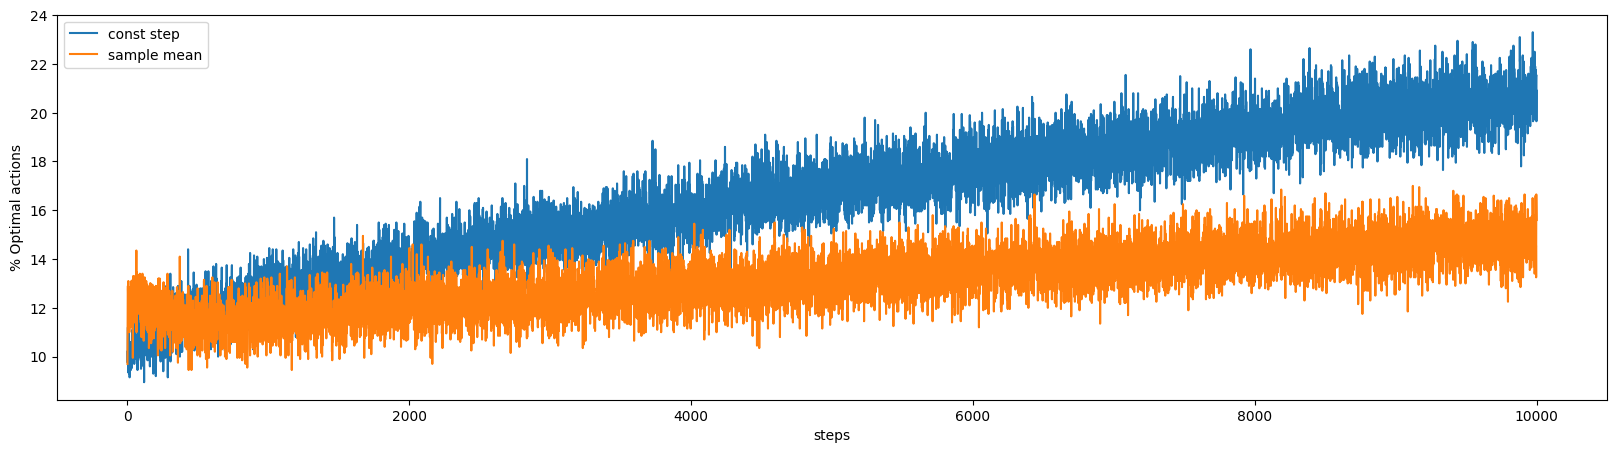

In [102]:
plt.figure(figsize=(20, 5))

plt.plot(is_optimal_const_step_step_mean * 100, label="const step")
plt.plot(all_is_optimal_step_mean * 100, label="sample mean")
plt.legend()
plt.ylabel("% Optimal actions")
plt.xlabel("steps")
plt.show()

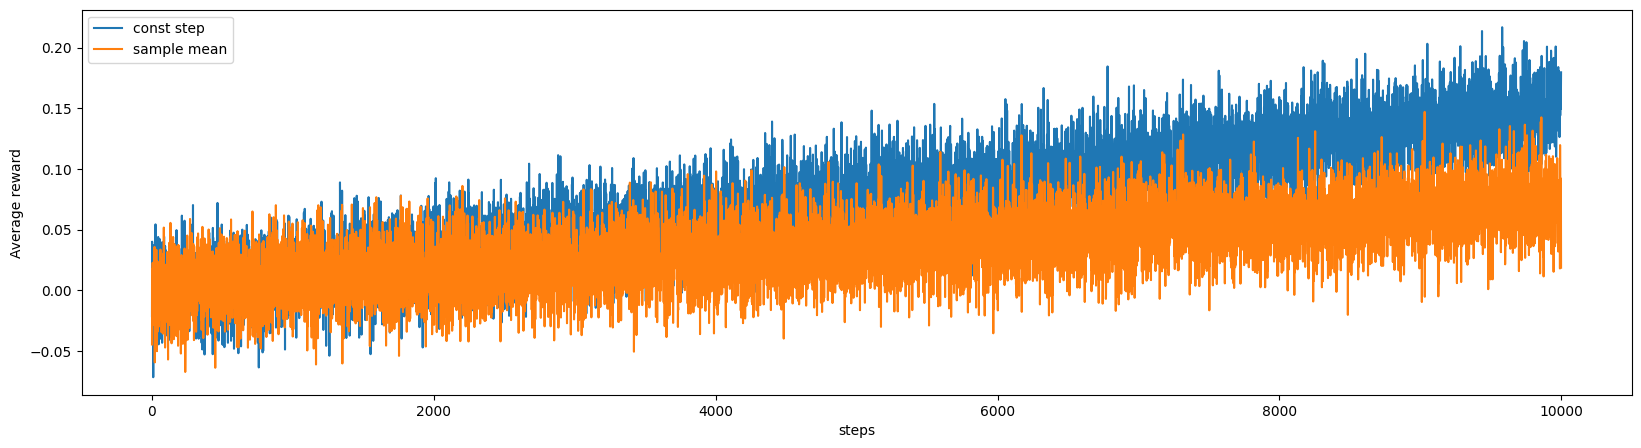

In [101]:
plt.figure(figsize=(20, 5))

plt.plot(all_rewards_const_step_step_mean, label="const step")
plt.plot(all_rewards_step_mean, label="sample mean")
plt.ylabel("Average reward")
plt.xlabel("steps")
plt.legend()
plt.show()